In [2]:
import pandas as pd
from datetime import datetime
chats = pd.read_csv("./chatlogs/uncleanData.csv")
chats["chat_date"] = pd.to_datetime(chats["chat_date"], format = "%Y/%m/%d")
chats= chats.sort_values(by=["chat_date", "chat_hour", "chat_minute"])

In [2]:
chats

,chat_date,chat_hour,chat_minute,user,chat_message
0,2014-06-01,16,17,timbl_,timbl_ is now known as timbl
1,2014-06-01,18,54,Lajjla,Lajjla is now known as PhallicQ
2,2014-06-01,20,4,ormaaj_,ormaaj_ is now known as ormaaj
3,2014-06-01,20,46,wu_,wu_ is now known as ix9
4,2014-06-01,22,58,ix9,ix9 is now known as wu_
...,...,...,...,...,...
57,2014-06-05,22,8,kasei,cjz: GROUP BY (DAY(?dt)) ?
58,2014-06-05,22,10,kasei,that will group by day-of-month. if you want t...
59,2014-06-05,22,17,cjz,wow
60,2014-06-05,22,17,cjz,thanks


In [3]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [7]:
testQuery = "SELECT * FROM chats"

In [8]:
pysqldf(testQuery)

,chat_date,chat_hour,chat_minute,user,chat_message
0,2014-06-01 00:00:00.000000,16,17,timbl_,timbl_ is now known as timbl
1,2014-06-01 00:00:00.000000,18,54,Lajjla,Lajjla is now known as PhallicQ
2,2014-06-01 00:00:00.000000,20,4,ormaaj_,ormaaj_ is now known as ormaaj
3,2014-06-01 00:00:00.000000,20,46,wu_,wu_ is now known as ix9
4,2014-06-01 00:00:00.000000,22,58,ix9,ix9 is now known as wu_
...,...,...,...,...,...
174,2014-06-05 00:00:00.000000,22,8,kasei,cjz: GROUP BY (DAY(?dt)) ?
175,2014-06-05 00:00:00.000000,22,10,kasei,that will group by day-of-month. if you want t...
176,2014-06-05 00:00:00.000000,22,17,cjz,wow
177,2014-06-05 00:00:00.000000,22,17,cjz,thanks


In [31]:
top3Query = "SELECT user, COUNT(chat_message) as message_count FROM chats GROUP BY user ORDER BY message_count DESC LIMIT 3"

In [32]:
pysqldf(top3Query)

,user,message_count
0,sesuncedu,27
1,jbalnit,23
2,wu_,20


In [6]:
hourQuery = "SELECT chat_hour, count(DISTINCT user) as user, count(chat_message) as messages FROM chats GROUP BY chat_hour ORDER BY user ASC"

In [7]:
reult = pysqldf(hourQuery)

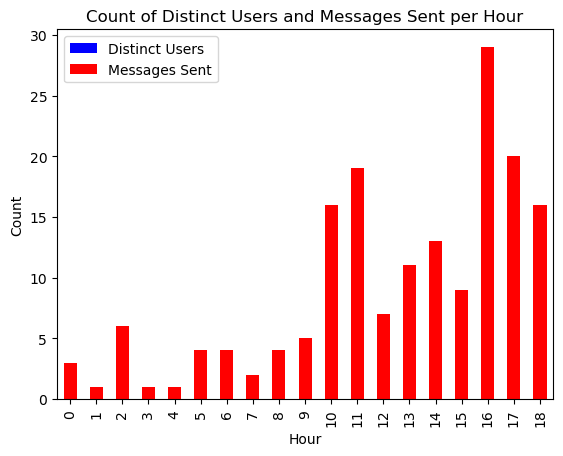

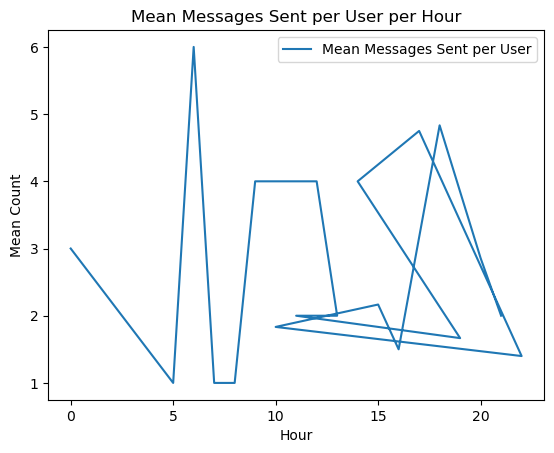

In [10]:
import matplotlib.pyplot as plt

reult['user'].plot(kind='bar', x='chat_hour', y='user', color='blue', label='Distinct Users')
reult['messages'].plot(kind='bar', x='chat_hour', y='messages', color='red', label='Messages Sent')

plt.legend(loc='best')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Count of Distinct Users and Messages Sent per Hour')
plt.show()
reult['mean_messages_sent_per_user'] = reult['messages'] / reult['user']
reult.plot(x='chat_hour', y='mean_messages_sent_per_user', kind='line', label='Mean Messages Sent per User')

plt.legend(loc='best')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.title('Mean Messages Sent per User per Hour')
plt.show()